import libraries:

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
students_data = pd.read_csv('C:\\Users\Мирослава\Downloads\StudentsPerformance2.csv')
students_data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Мирослава\\Downloads\\StudentsPerformance2.csv'

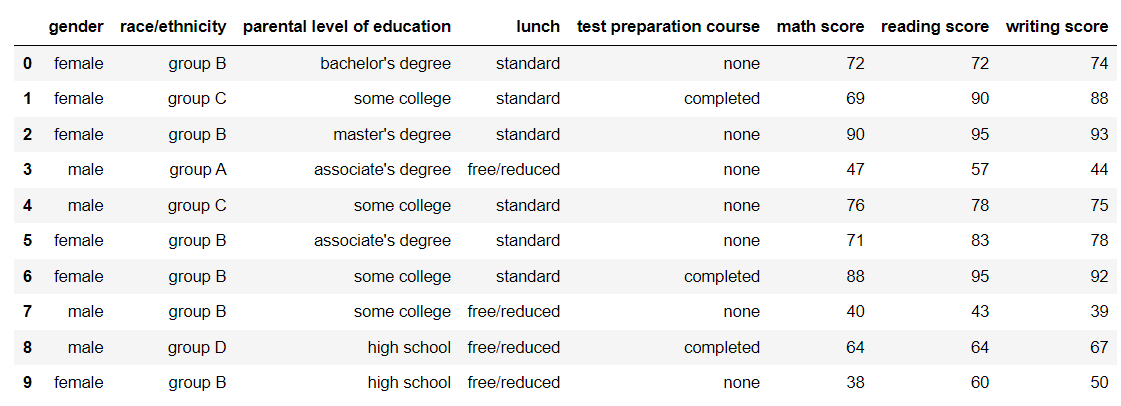

Creating a new column with summary mark: 

In [ ]:
students_data['summary'] = students_data['math score']+students_data['reading score']+students_data['writing score']
students_data['final mark']=students_data['summary']

Making a plot to see how is it better to mark students:  

In [ ]:
plt.hist(students_data['summary'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

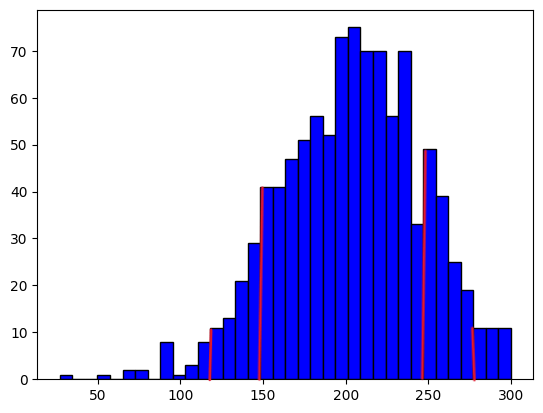

In [ ]:
students_data.loc[students_data['summary'] >= 270 , 'final mark'] = 0 #best students
students_data.loc[(students_data['summary'] < 270) & (students_data['summary'] >=250) , 'final mark'] = 1 #good students
students_data.loc[(students_data['summary'] < 250) & (students_data['summary'] >=150), 'final mark'] = 2 #common students
students_data.loc[(students_data['summary'] < 150) & (students_data['summary']>=125), 'final mark'] = 3 #struggling students
students_data.loc[students_data['summary'] < 125 ,'final mark'] = 4 #failed 


See how features effects marks:


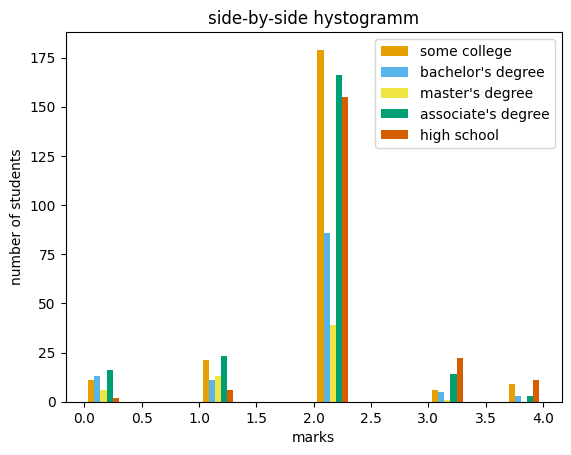

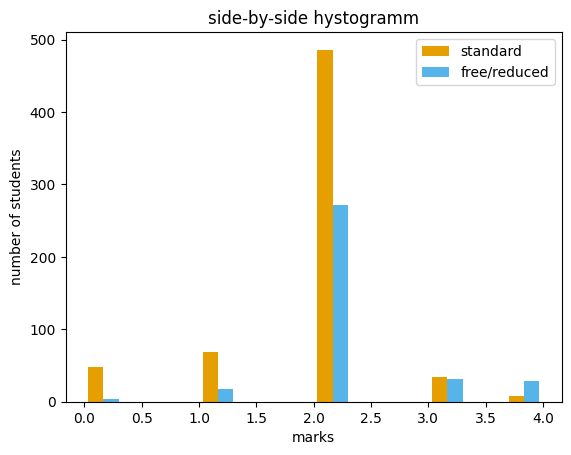

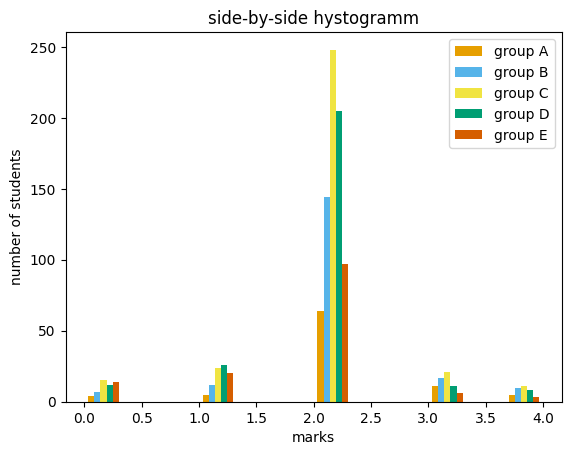

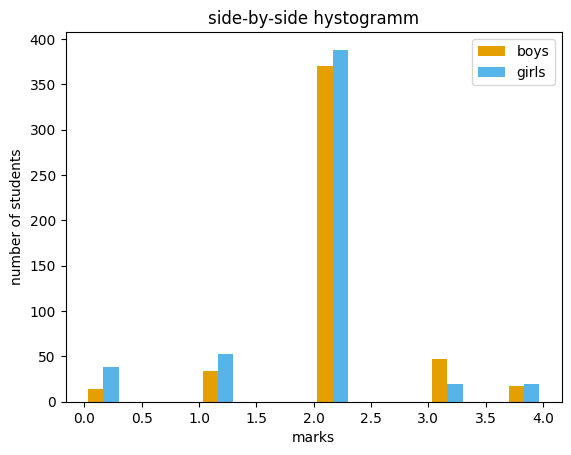

Splitting data on features (X) and result (Y):

In [ ]:
X = students_data[['gender', 'race/ethnicity', 'lunch', 'test preparation course', 'parental level of education']]
Y = students_data[['final mark']]
X = X.replace(['standard', 'free/reduced'], [1, 0])
X = X.replace(['completed', 'none'], [1, 0])
X = X.replace(['group A', 'group B', 'group C', 'group D', 'group E'], [0, 1, 2, 3, 4])
X = X.replace(['female', 'male'], [1, 0])
X = X.get_dummies()

Splitting data on train and test data:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

Creating a neuron network:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(10,)),
    #  first layer consists of 64 neurons, input_shape 10(ten features)
    tf.keras.layers.Dropout(0.1),
    #  Dropout -some neurons are randomly dropped out to avoid overtraining
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5, activation='softmax')  # Выходной слой с 3 нейронами (по числу классов) и функцией активации softmax для многоклассовой классификации
])

In [ ]:
# Model compilation
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  

Model training:

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=2, validation_split=0.2, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)

predictions = model.predict(X_test)

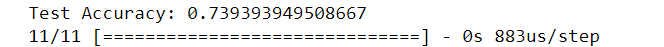

This model can be used for predicting students' marks and motivating them to have lunch and take preparation courses:-)